# Regresion lineal sobre datos socio demográficos y de recursos de salud a nivel de condado de EE. UU. (2018-2019)

Instrucciones

Se han recopilado datos socio demográficos y de recursos de salud por condado en los Estados Unidos y queremos descubrir si existe alguna relación entre los recursos sanitarios y los datos socio demográficos.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, f_regression, SelectKBest
# Modelado
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, ElasticNet
# Métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score
# Optimizar
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# from tqdm import tqdm
import warnings
from utils import get_regression_metrics


In [2]:
# Mostrar todas las filas
pd.set_option("display.max_rows", None)

# Mostrar todas las columnas
pd.set_option("display.max_columns", None)

# Ajustar el ancho de cada columna si es necesario
pd.set_option("display.max_colwidth", None)

# Aumentar el ancho total del display
pd.set_option("display.width", 0)

In [3]:
df = pd.read_csv('/workspaces/sarayruiz---Machine-Learning/data/raw/reg-demographic.csv', sep=',')
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

In [4]:
df.columns


Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


> ### Observaciones:
>
>- Tenemos en la base de datos 3140 filas y 108 columnas.
>- Solo dos columnas son Objetos. El resto son números.
>- 

## Limpieza de datos

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [7]:
#Eliminar duplicados.
df_inicio = df.drop_duplicates()
df_inicio.head()


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

In [8]:

columns_drop = ['fips', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+', 'White-alone pop', 'Black-alone pop',
                'Native American/American Indian-alone pop', 'Asian-alone pop', 'Hawaiian/Pacific Islander-alone pop', 'Two or more races pop',
                'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'Population Aged 60+','R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018',
                'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', 'High school diploma only 2014-18',
                "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'STATE_FIPS','county_pop2018_18 and older', 'anycondition_Lower 95% CI',
                'anycondition_Upper 95% CI', 'Obesity_Lower 95% CI', 'Obesity_Upper 95% CI', 'Heart disease_prevalence', 'Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI',
                'COPD_prevalence', 'COPD_Lower 95% CI', 'COPD_Upper 95% CI','diabetes_prevalence', 'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI', 'CKD_prevalence', 'CKD_Lower 95% CI',
                'CKD_Upper 95% CI']
                
df_inicio.drop(columns_drop, axis=1, inplace=True)

df_inicio.head()


,TOT_POP,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,80+ y/o % of total pop,% White-alone,% Black-alone,% NA/AI-alone,% Asian-alone,% Hawaiian/PI-alone,% Two or more races,POP_ESTIMATE_2018,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,CNTY_FIPS,anycondition_prevalence,anycondition_number,Obesity_prevalence,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,Urban_rural_code
0,55601,12.206615,13.735364,12.370281,12.749771,13.636445,13.917016,10.478229,7.284042,3.622237,76.725239,19.630942,0.480207,1.224798,0.111509,1.827305,55601,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,19.1,Autauga,Alabama,1,47.6,20181,35.8,15193,3345,3644,5462,1326,3
1,218022,11.355276,12.344167,10.814964,11.564429,12.539102,13.753658,13.728890,9.602701,4.296814,87.285228,8.940382,0.772399,1.150343,0.066966,1.784682,218022,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,26.3,Baldwin,Alabama,3,40.2,68790,29.7,50761,13414,14692,20520,5479,4
2,24881,10.980266,11.896628,13.134520,12.865239,12.354809,13.174712,12.362847,9.018930,4.212049,49.069571,48.398376,0.659137,0.454162,0.184880,1.233873,24881,27.0,35.7,25.1,12.2,6788,30.9,43.9,36.7,34382,31157,37607,8373,7940,433,5.2,34382,68.9,217.1,196.7,77.2,71.2,7.6,6.9,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,5,26201,23.5,Barbour,Alabama,5,57.5,11325,40.7,8013,2159,2373,3870,887,6
3,22400,10.964286,11.589286,13.522321,13.897321,13.562500,13.906250,11.361607,7.691964,3.504464,76.834821,21.294643,0.437500,0.236607,0.116071,1.080357,22400,16.8,47.3,24.4,11.5,4400,21.8,27.8,26.3,46064,41283,50845,8661,8317,344,4.0,46064,92.3,217.1,196.7,77.2,71.2,7.6,6.9,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,0,22580,21.1,Bibb,Alabama,7,51.6,9190,38.7,6894,1533,1789,2511,595,2
4,57840,12.266598,13.087828,11.656293,11.901798,12.921853,13.561549,12.041840,8.525242,4.036999,95.878285,1.642462,0.653527,0.319848,0.121024,1.384855,57840,19.8,34.0,33.5,12.6,7527,13.2,18.0,15.5,50412,46157,54667,25006,24128,878,3.5,50412,101.1,217.1,196.7,77.2,71.2,7.6,6.9,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,6,57667,23.6,Blount,Alabama,9,46.3,20584,34.0,15112,4101,4661,6017,1507,2


In [9]:
df_inicio.columns


Index(['TOT_POP', '0-9 y/o % of total pop', '10-19 y/o % of total pop',
       '20-29 y/o % of total pop', '30-39 y/o % of total pop',
       '40-49 y/o % of total pop', '50-59 y/o % of total pop',
       '60-69 y/o % of total pop', '70-79 y/o % of total pop',
       '80+ y/o % of total pop', '% White-alone', '% Black-alone',
       '% NA/AI-alone', '% Asian-alone', '% Hawaiian/PI-alone',
       '% Two or more races', 'POP_ESTIMATE_2018',
       'Percent of adults with less than a high school diploma 2014-18',
       'Percent of adults with a high school diploma only 2014-18',
       'Percent of adults completing some college or associate's degree 2014-18',
       'Percent of adults with a bachelor's degree or higher 2014-18',
       'POVALL_2018', 'PCTPOVALL_2018', 'PCTPOV017_2018', 'PCTPOV517_2018',
       'MEDHHINC_2018', 'CI90LBINC_2018', 'CI90UBINC_2018',
       'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
       'Unemployment_rate_2018', 'Median_Household_Inco

In [10]:
df_inicio.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 61 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   TOT_POP                                                                        3140 non-null   int64  
 1   0-9 y/o % of total pop                                                         3140 non-null   float64
 2   10-19 y/o % of total pop                                                       3140 non-null   float64
 3   20-29 y/o % of total pop                                                       3140 non-null   float64
 4   30-39 y/o % of total pop                                                       3140 non-null   float64
 5   40-49 y/o % of total pop                                                       3140 non-null   float64
 6   50-59 y/o % of total pop

> ### Observaciones:
>- Elimino esas columnas porque voy a trabajar con los %.

>Elimino columnas como:
>- Elimino todas la columnas con rangos de edades.
>- Variación numérica de la población total residente del 1/7/2017 al 1/7/2018.
>- Estimación de la población total en alojamientos colectivos (7/1/2018).
>- Tasa de natalidad en el período del 1 de julio de 2017 al 30 de junio de 2018.
>- Tasa de mortalidad en el período del 1 de julio de 2017 al 30 de junio de 2018.
>- Tasa de crecimiento natural en el período del 1/7/2016 al 30/6/2017
>- Tasa neta de migración internacional en el período del 1/7/2017 al 30/6/2018
>- Tasa neta de migración interna en el período del 1/7/2017 al 30/6/2018
>- Tasa neta de migración en el período del 1/7/2017 al 30/6/2018
>- Las variables de educación se explican por sí mismas: las primeras cuatro son cifras numéricas y las cuatro siguientes, porcentajes.
>- Solo diploma de bachillerato (2014-2018)
>- Estudios universitarios incompletos o título de técnico superior (2014-2018)
>- Licenciatura o título superior (2014-2018)
>- Codigo Fips del estado.
>- Población mayor de 18 años por condado en 2018


De momento no elimino ninguna más

## Analisis de variables

> ### Variables Categóricas

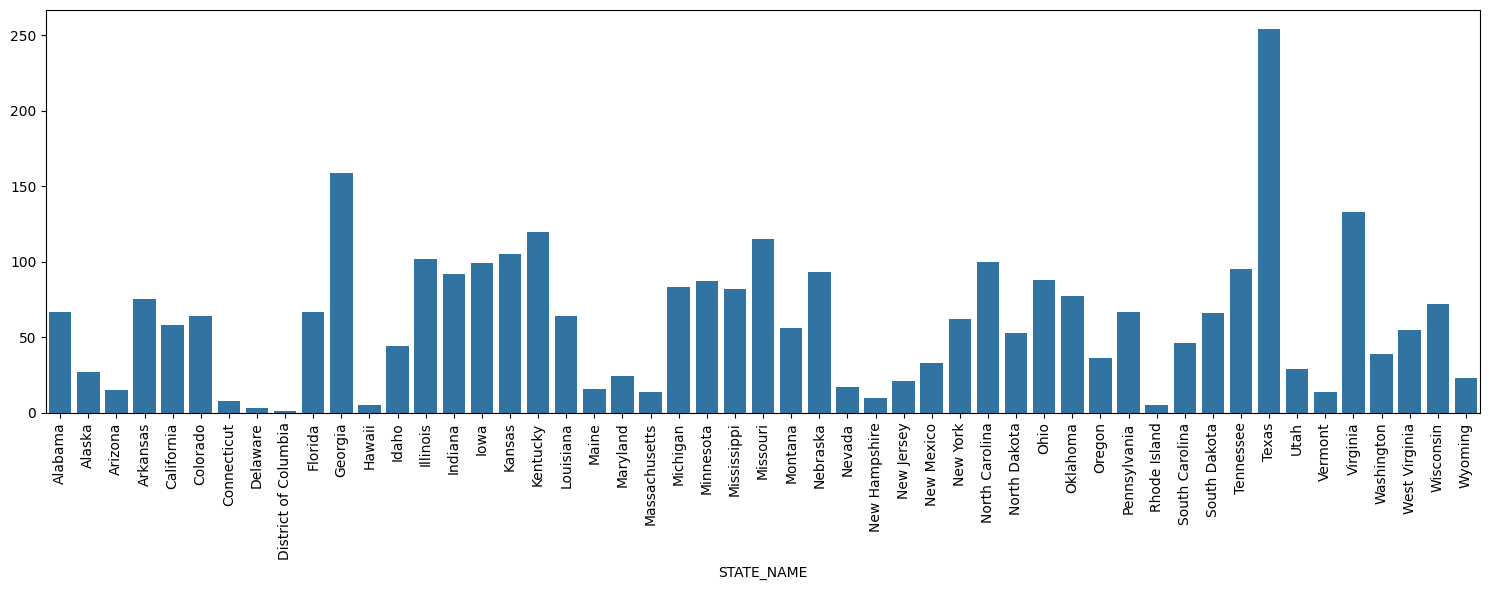

In [11]:
fig, axis = plt.subplots(1, 1, figsize=(15,6))

sns.countplot(ax=axis, data=df_inicio, x='STATE_NAME').set(ylabel=None)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


<Axes: xlabel='COUNTY_NAME'>

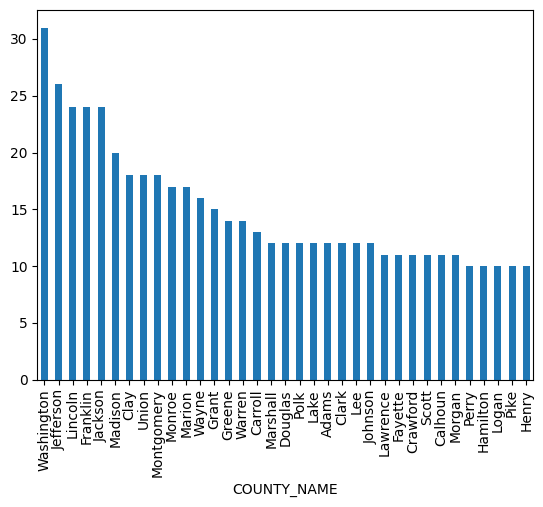

In [12]:

df_inicio['COUNTY_NAME'].value_counts().head(35).plot(kind='bar')


## Variables númericas

> Las analizaremos directamente en la correlación una vez que factoricemos el data.

Factorizo las dos columnas Objetos.

In [13]:
df_inicio['COUNTY_NAME'].value_counts().head(25)

COUNTY_NAME
Washington    31
Jefferson     26
Lincoln       24
Franklin      24
Jackson       24
Madison       20
Clay          18
Union         18
Montgomery    18
Monroe        17
Marion        17
Wayne         16
Grant         15
Greene        14
Warren        14
Carroll       13
Marshall      12
Douglas       12
Polk          12
Lake          12
Adams         12
Clark         12
Lee           12
Johnson       12
Lawrence      11
Name: count, dtype: int64

In [14]:
df_inicio['county_n'] = pd.factorize(df_inicio['COUNTY_NAME'])[0]
df_inicio['county_n'].value_counts().head(10)

county_n
64     31
36     26
138    24
29     24
35     24
44     20
13     18
161    18
50     18
49     17
Name: count, dtype: int64

In [15]:
df_inicio['STATE_NAME'].value_counts().head(15)

STATE_NAME
Texas             254
Georgia           159
Virginia          133
Kentucky          120
Missouri          115
Kansas            105
Illinois          102
North Carolina    100
Iowa               99
Tennessee          95
Nebraska           93
Indiana            92
Ohio               88
Minnesota          87
Michigan           83
Name: count, dtype: int64

In [16]:
df_inicio['state_n'] = pd.factorize(df_inicio['STATE_NAME'])[0]
df_inicio['state_n'].value_counts().head(10)

state_n
43    254
10    159
46    133
17    120
25    115
16    105
13    102
33    100
15     99
42     95
Name: count, dtype: int64

In [17]:
# Creamos dos json donde ver que número se le ha asignado a cada categoría.
regdemo_county = {row['COUNTY_NAME']: row['county_n'] for _, row in df_inicio.iterrows()}


In [18]:
regdemo_state = {row['STATE_NAME']: row['state_n'] for _, row in df_inicio.iterrows()}

In [19]:

with open('../data/processed/regdemo_county.json', 'w') as file:
    json.dump(regdemo_county, file)

with open('../data/processed/regdemo_state.json', 'w') as file:
    json.dump(regdemo_state, file)


> Creo DataFrame Factorizado eliminando las columnas objeto que ya he factorizado.

In [20]:
df_facto = df_inicio.copy()
df_facto.drop(['COUNTY_NAME','STATE_NAME'], axis=1, inplace=True)
df_facto.head()

,TOT_POP,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,80+ y/o % of total pop,% White-alone,% Black-alone,% NA/AI-alone,% Asian-alone,% Hawaiian/PI-alone,% Two or more races,POP_ESTIMATE_2018,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Percent of Population Aged 60+,CNTY_FIPS,anycondition_prevalence,anycondition_number,Obesity_prevalence,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,Urban_rural_code,county_n,state_n
0,55601,12.206615,13.735364,12.370281,12.749771,13.636445,13.917016,10.478229,7.284042,3.622237,76.725239,19.630942,0.480207,1.224798,0.111509,1.827305,55601,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,19.1,1,47.6,20181,35.8,15193,3345,3644,5462,1326,3,0,0
1,218022,11.355276,12.344167,10.814964,11.564429,12.539102,13.753658,13.728890,9.602701,4.296814,87.285228,8.940382,0.772399,1.150343,0.066966,1.784682,218022,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,26.3,3,40.2,68790,29.7,50761,13414,14692,20520,5479,4,1,0
2,24881,10.980266,11.896628,13.134520,12.865239,12.354809,13.174712,12.362847,9.018930,4.212049,49.069571,48.398376,0.659137,0.454162,0.184880,1.233873,24881,27.0,35.7,25.1,12.2,6788,30.9,43.9,36.7,34382,31157,37607,8373,7940,433,5.2,34382,68.9,217.1,196.7,77.2,71.2,7.6,6.9,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,5,26201,23.5,5,57.5,11325,40.7,8013,2159,2373,3870,887,6,2,0
3,22400,10.964286,11.589286,13.522321,13.897321,13.562500,13.906250,11.361607,7.691964,3.504464,76.834821,21.294643,0.437500,0.236607,0.116071,1.080357,22400,16.8,47.3,24.4,11.5,4400,21.8,27.8,26.3,46064,41283,50845,8661,8317,344,4.0,46064,92.3,217.1,196.7,77.2,71.2,7.6,6.9,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,0,22580,21.1,7,51.6,9190,38.7,6894,1533,1789,2511,595,2,3,0
4,57840,12.266598,13.087828,11.656293,11.901798,12.921853,13.561549,12.041840,8.525242,4.036999,95.878285,1.642462,0.653527,0.319848,0.121024,1.384855,57840,19.8,34.0,33.5,12.6,7527,13.2,18.0,15.5,50412,46157,54667,25006,24128,878,3.5,50412,101.1,217.1,196.7,77.2,71.2,7.6,6.9,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,6,57667,23.6,9,46.3,20584,34.0,15112,4101,4661,6017,1507,2,4,0


> Creo mapa de calor de > de 0,40 para ver las más correlacionadas y eliminar más columnas.

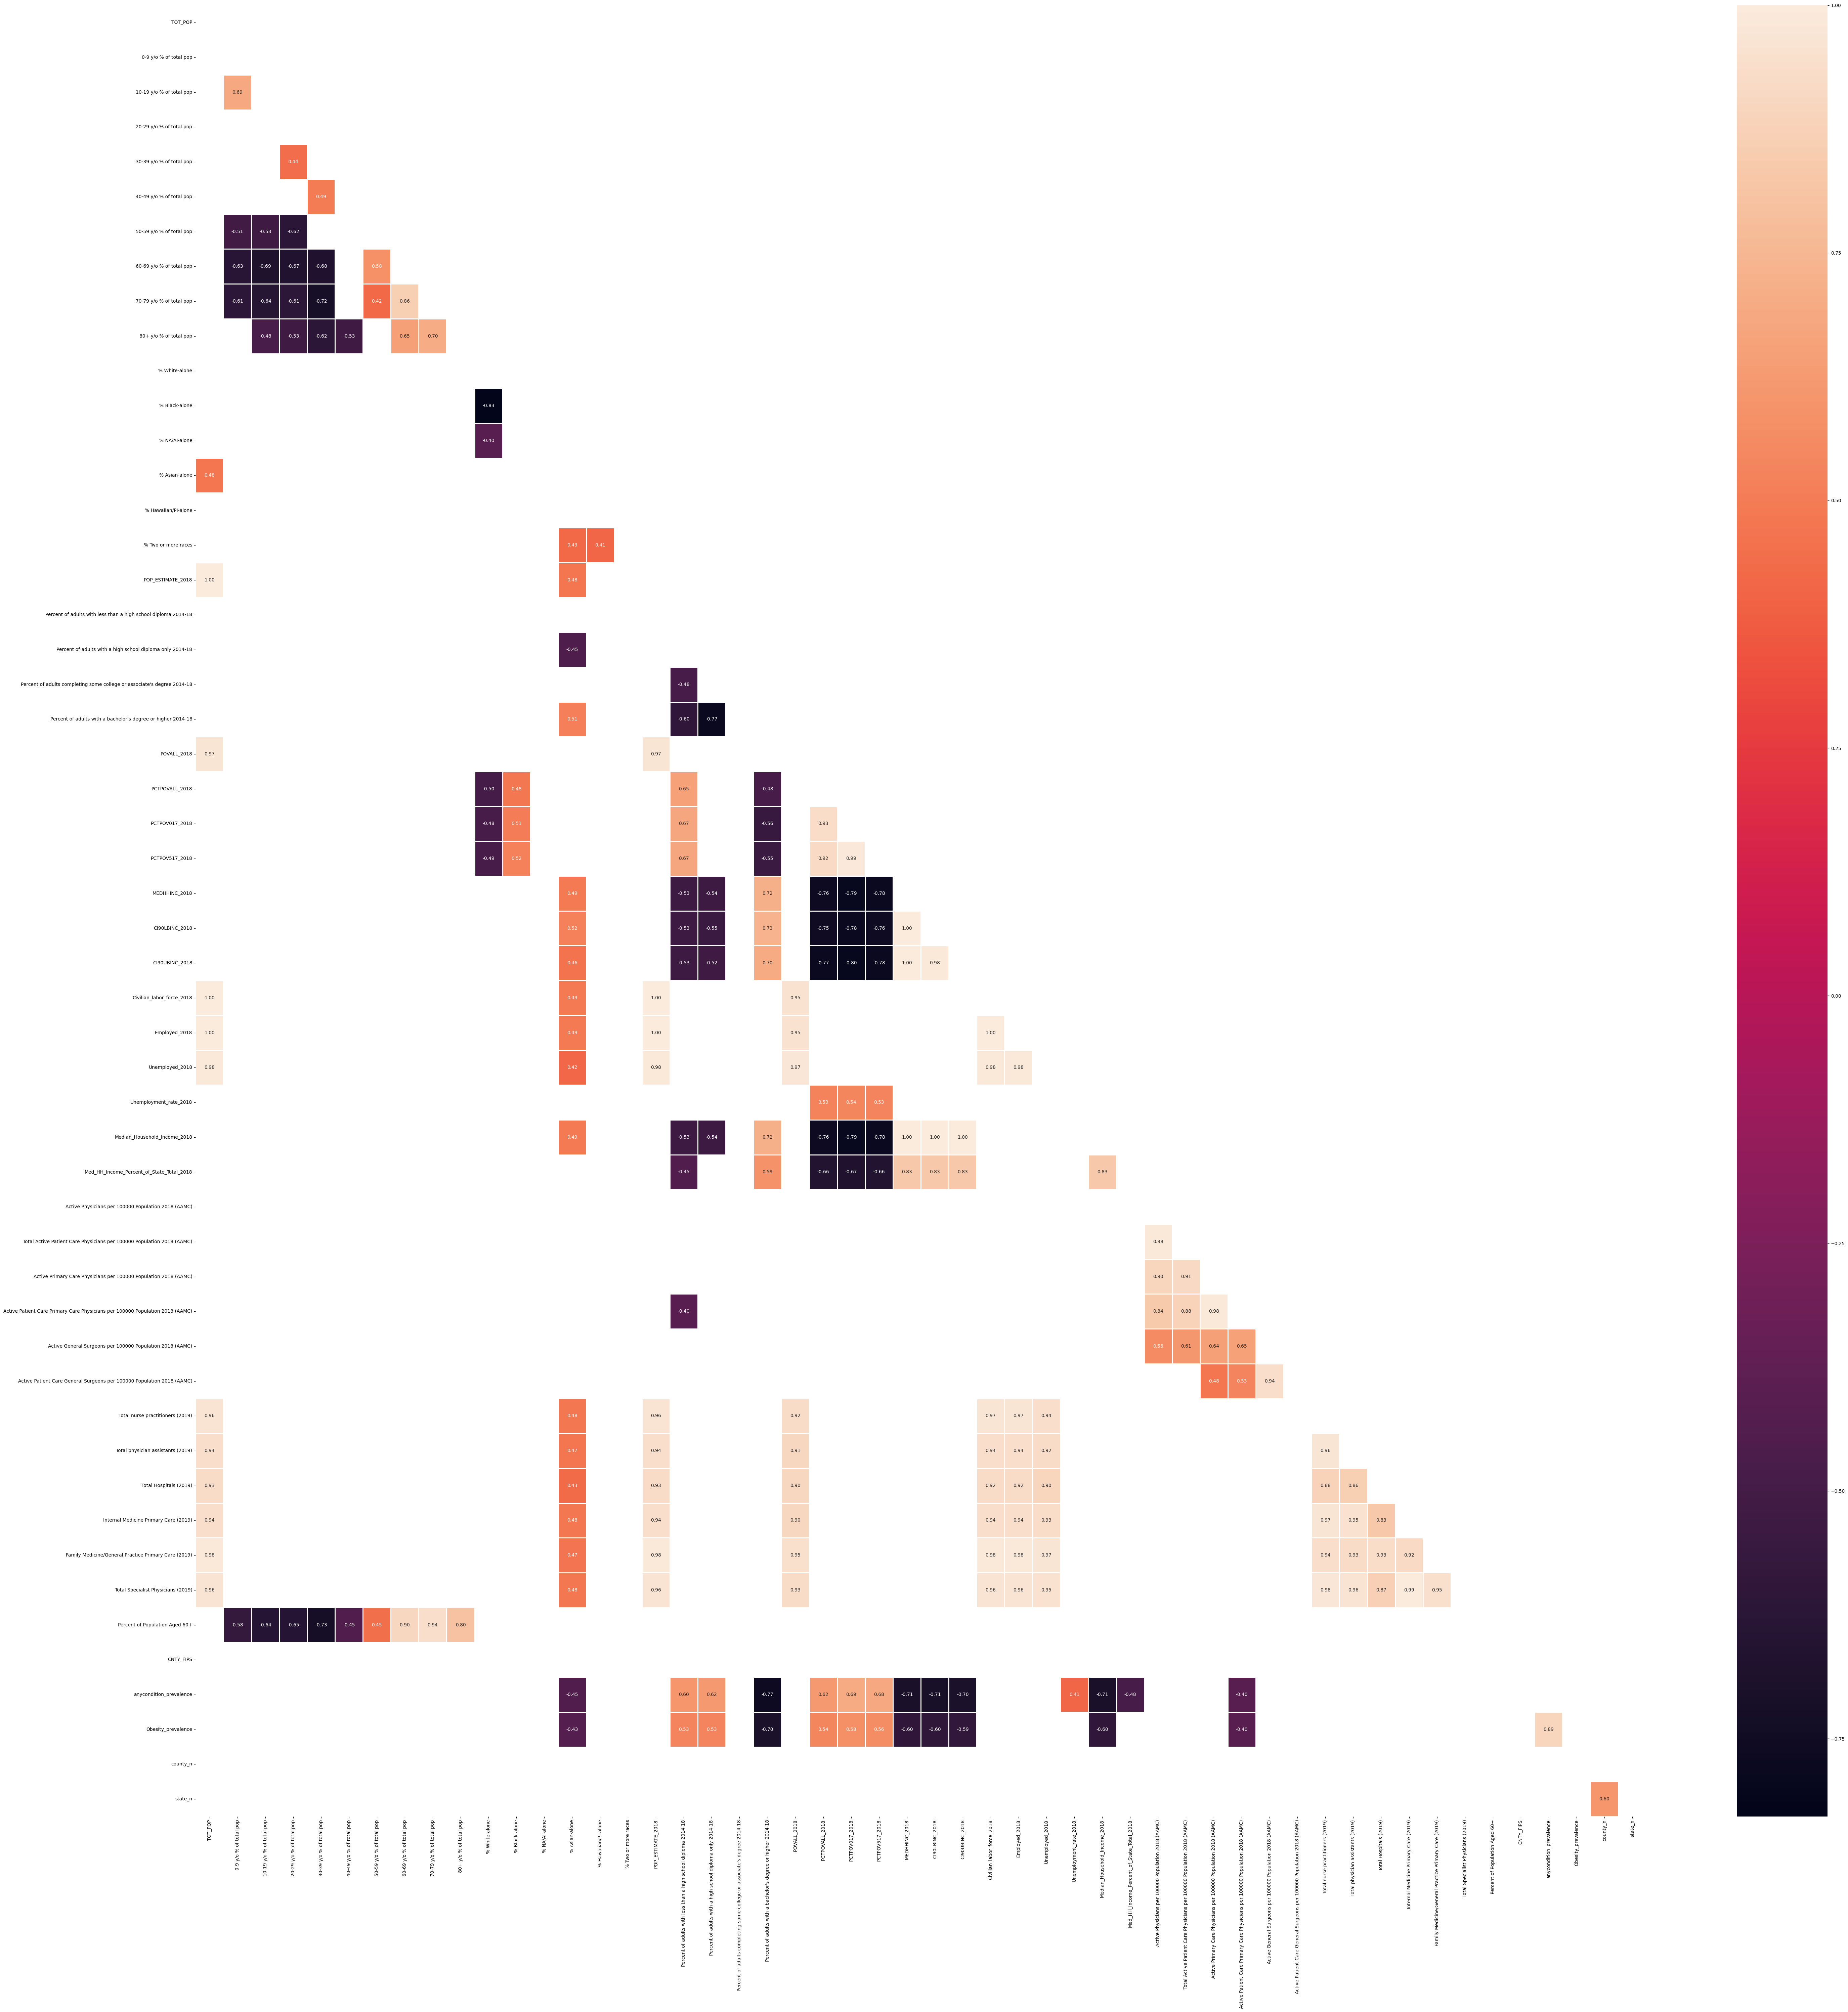

In [59]:
corr = df_facto.corr()
high_correlation = corr[corr.abs() > 0.40]
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axis = plt.subplots(figsize=(60,60))
sns.heatmap(high_correlation, annot=True, mask=mask, linewidths=1, fmt=".2f")

plt.tight_layout()
plt.show()


> Elimino todas las columnas que no esten correlacionadas con mi Target que es "Total Specialist Physicians (2019)"

In [22]:
columns_drop = ['ICU Beds_x', 'Total Population', 'anycondition_number', 'Obesity_number', 'Heart disease_number',
                'COPD_number','diabetes_number', 'CKD_number', 'Urban_rural_code']
                
df_facto.drop(columns_drop, axis=1, inplace=True)

df_facto.head()

,TOT_POP,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,80+ y/o % of total pop,% White-alone,% Black-alone,% NA/AI-alone,% Asian-alone,% Hawaiian/PI-alone,% Two or more races,POP_ESTIMATE_2018,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),Percent of Population Aged 60+,CNTY_FIPS,anycondition_prevalence,Obesity_prevalence,county_n,state_n
0,55601,12.206615,13.735364,12.370281,12.749771,13.636445,13.917016,10.478229,7.284042,3.622237,76.725239,19.630942,0.480207,1.224798,0.111509,1.827305,55601,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,19.1,1,47.6,35.8,0,0
1,218022,11.355276,12.344167,10.814964,11.564429,12.539102,13.753658,13.728890,9.602701,4.296814,87.285228,8.940382,0.772399,1.150343,0.066966,1.784682,218022,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,26.3,3,40.2,29.7,1,0
2,24881,10.980266,11.896628,13.134520,12.865239,12.354809,13.174712,12.362847,9.018930,4.212049,49.069571,48.398376,0.659137,0.454162,0.184880,1.233873,24881,27.0,35.7,25.1,12.2,6788,30.9,43.9,36.7,34382,31157,37607,8373,7940,433,5.2,34382,68.9,217.1,196.7,77.2,71.2,7.6,6.9,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,23.5,5,57.5,40.7,2,0
3,22400,10.964286,11.589286,13.522321,13.897321,13.562500,13.906250,11.361607,7.691964,3.504464,76.834821,21.294643,0.437500,0.236607,0.116071,1.080357,22400,16.8,47.3,24.4,11.5,4400,21.8,27.8,26.3,46064,41283,50845,8661,8317,344,4.0,46064,92.3,217.1,196.7,77.2,71.2,7.6,6.9,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,21.1,7,51.6,38.7,3,0
4,57840,12.266598,13.087828,11.656293,11.901798,12.921853,13.561549,12.041840,8.525242,4.036999,95.878285,1.642462,0.653527,0.319848,0.121024,1.384855,57840,19.8,34.0,33.5,12.6,7527,13.2,18.0,15.5,50412,46157,54667,25006,24128,878,3.5,50412,101.1,217.1,196.7,77.2,71.2,7.6,6.9,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,23.6,9,46.3,34.0,4,0


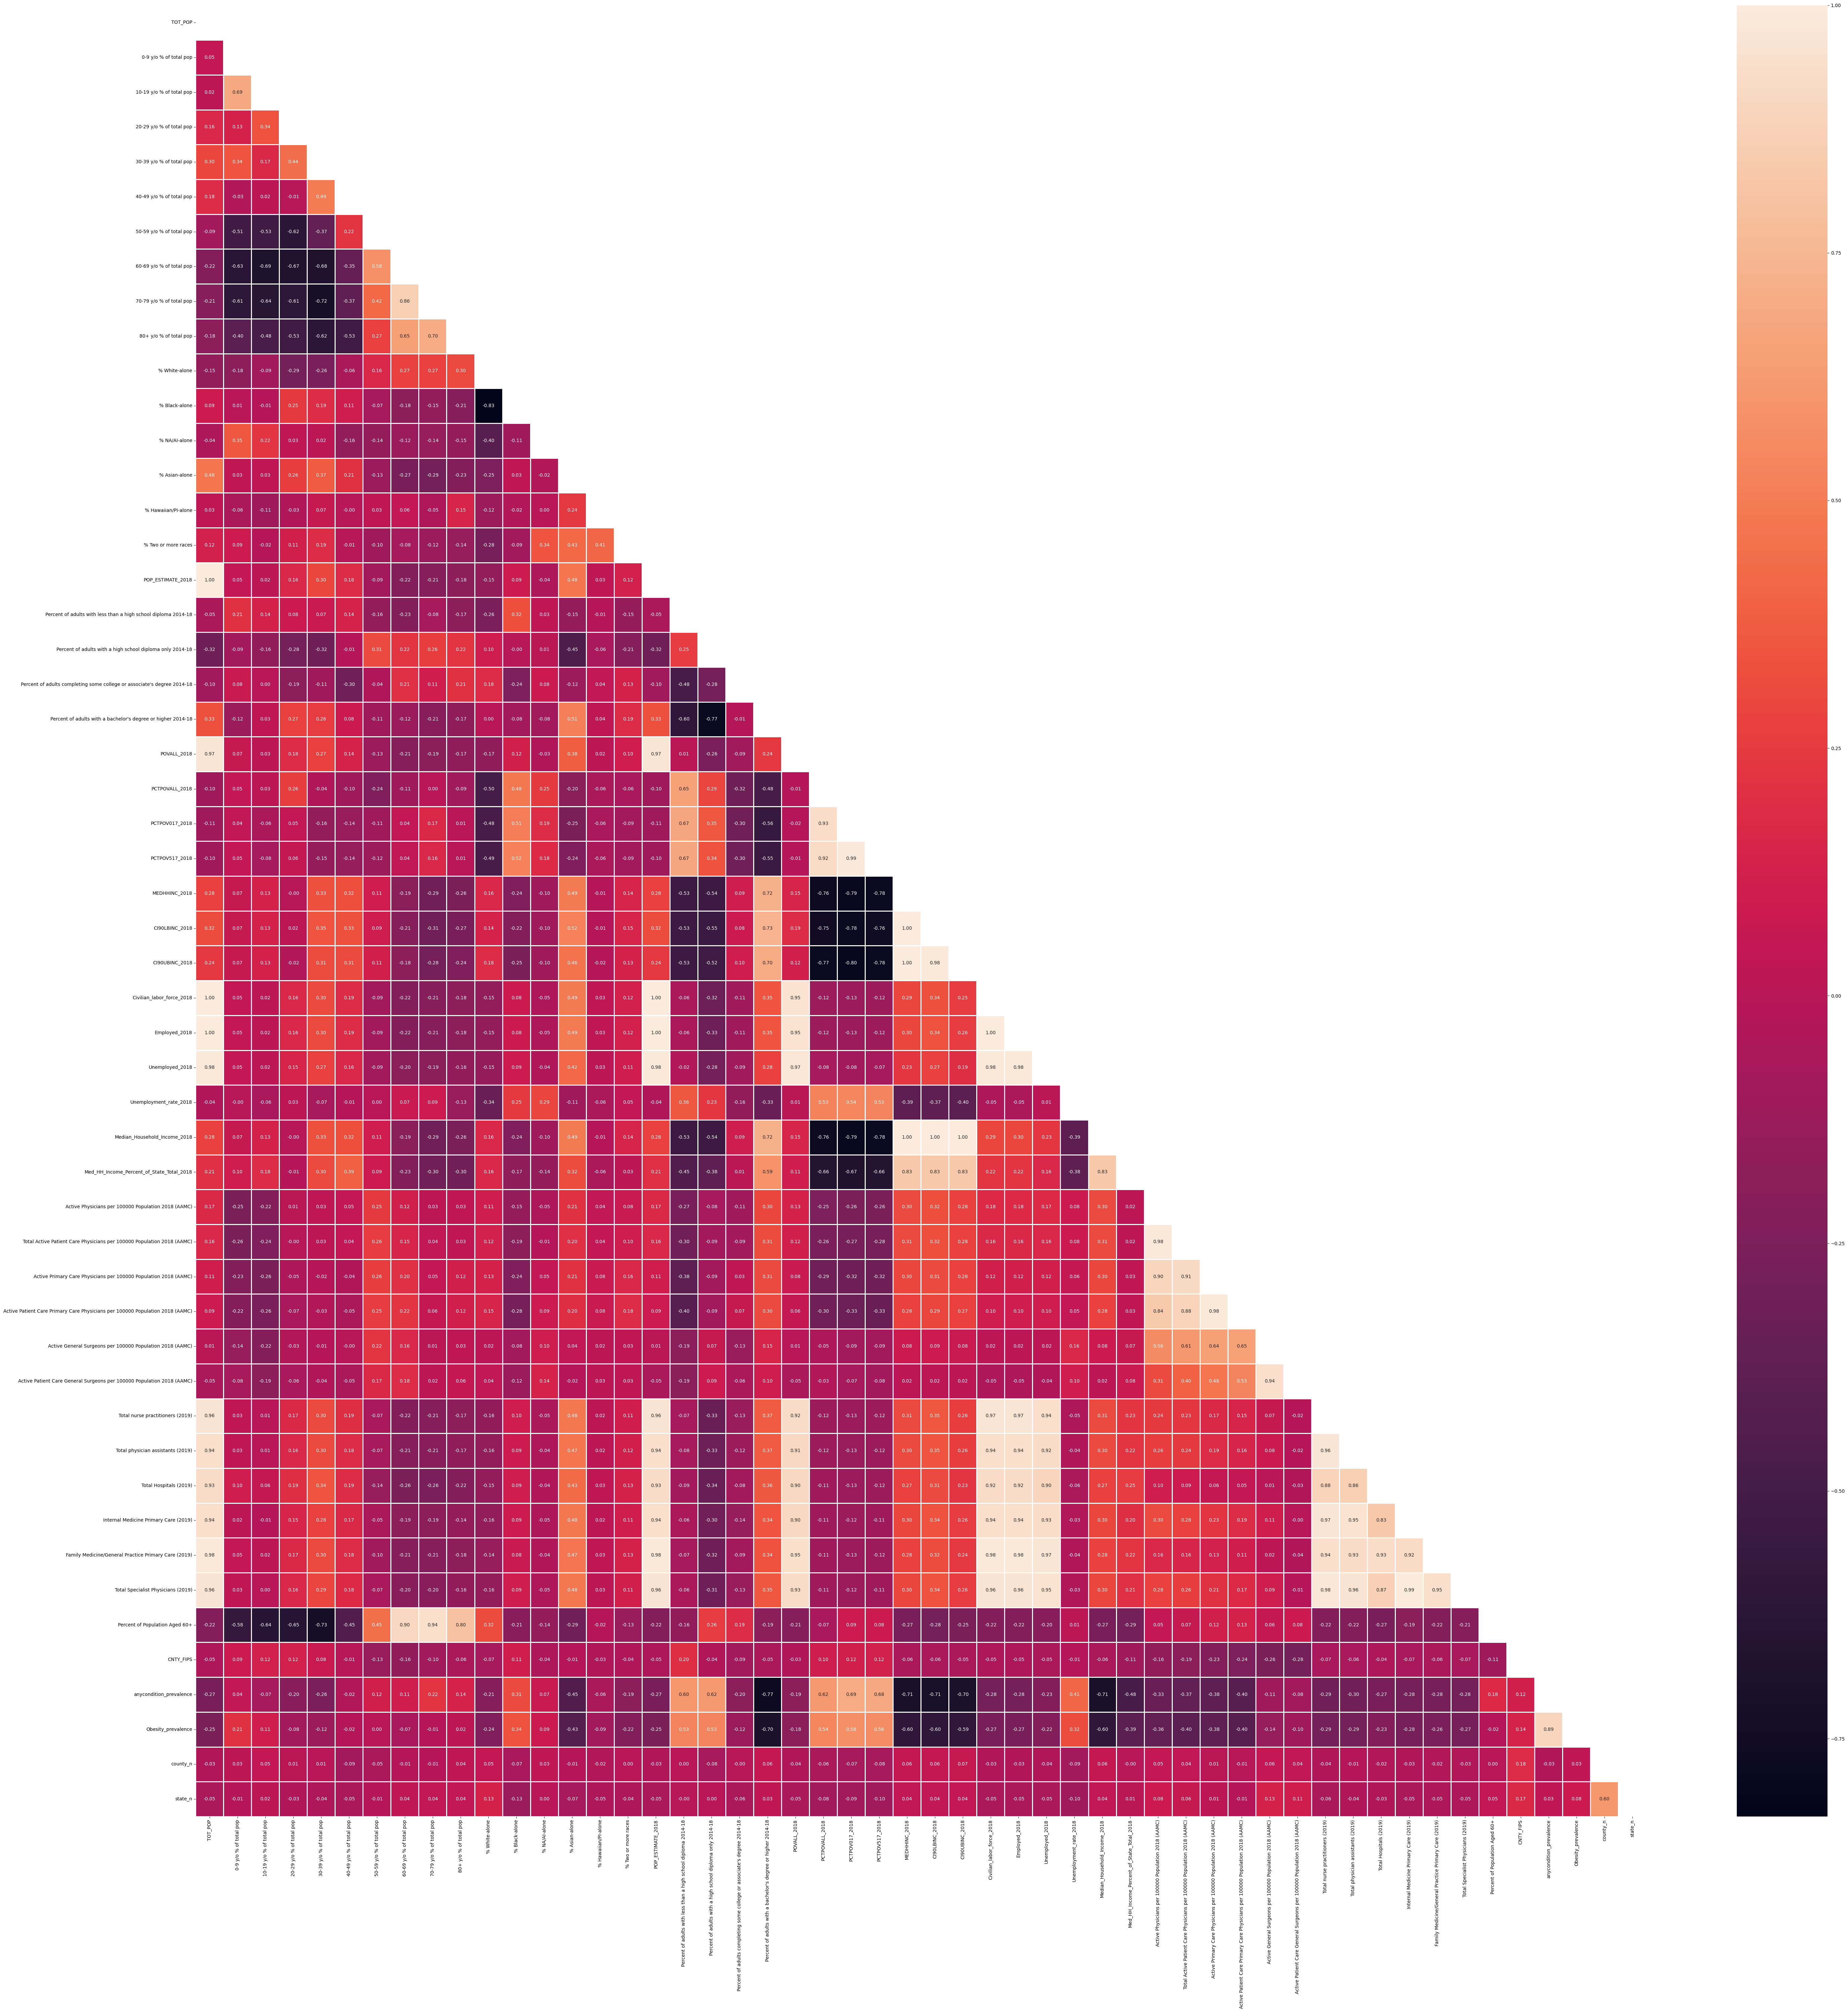

In [60]:
corr = df_facto.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axis = plt.subplots(figsize=(60,60))
sns.heatmap(corr, annot=True, mask=mask, linewidths=1, fmt=".2f")

plt.tight_layout()
plt.show()

In [24]:
df_facto.columns

Index(['TOT_POP', '0-9 y/o % of total pop', '10-19 y/o % of total pop',
       '20-29 y/o % of total pop', '30-39 y/o % of total pop',
       '40-49 y/o % of total pop', '50-59 y/o % of total pop',
       '60-69 y/o % of total pop', '70-79 y/o % of total pop',
       '80+ y/o % of total pop', '% White-alone', '% Black-alone',
       '% NA/AI-alone', '% Asian-alone', '% Hawaiian/PI-alone',
       '% Two or more races', 'POP_ESTIMATE_2018',
       'Percent of adults with less than a high school diploma 2014-18',
       'Percent of adults with a high school diploma only 2014-18',
       'Percent of adults completing some college or associate's degree 2014-18',
       'Percent of adults with a bachelor's degree or higher 2014-18',
       'POVALL_2018', 'PCTPOVALL_2018', 'PCTPOV017_2018', 'PCTPOV517_2018',
       'MEDHHINC_2018', 'CI90LBINC_2018', 'CI90UBINC_2018',
       'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
       'Unemployment_rate_2018', 'Median_Household_Inco

In [25]:
df_facto.shape

(3140, 52)

## Split

In [26]:
#Elimino del df inicial las columnas que también he eliminado en el factorizado más las dos que añadí factorizadas.
columns_drop = ['ICU Beds_x', 'Total Population', 'anycondition_number', 'Obesity_number', 'Heart disease_number',
                'COPD_number','diabetes_number', 'CKD_number', 'Urban_rural_code','state_n', 'county_n']
                
df_inicio.drop(columns_drop, axis=1, inplace=True)

df_inicio.head()

,TOT_POP,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,80+ y/o % of total pop,% White-alone,% Black-alone,% NA/AI-alone,% Asian-alone,% Hawaiian/PI-alone,% Two or more races,POP_ESTIMATE_2018,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,CNTY_FIPS,anycondition_prevalence,Obesity_prevalence
0,55601,12.206615,13.735364,12.370281,12.749771,13.636445,13.917016,10.478229,7.284042,3.622237,76.725239,19.630942,0.480207,1.224798,0.111509,1.827305,55601,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,19.1,Autauga,Alabama,1,47.6,35.8
1,218022,11.355276,12.344167,10.814964,11.564429,12.539102,13.753658,13.728890,9.602701,4.296814,87.285228,8.940382,0.772399,1.150343,0.066966,1.784682,218022,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,26.3,Baldwin,Alabama,3,40.2,29.7
2,24881,10.980266,11.896628,13.134520,12.865239,12.354809,13.174712,12.362847,9.018930,4.212049,49.069571,48.398376,0.659137,0.454162,0.184880,1.233873,24881,27.0,35.7,25.1,12.2,6788,30.9,43.9,36.7,34382,31157,37607,8373,7940,433,5.2,34382,68.9,217.1,196.7,77.2,71.2,7.6,6.9,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,23.5,Barbour,Alabama,5,57.5,40.7
3,22400,10.964286,11.589286,13.522321,13.897321,13.562500,13.906250,11.361607,7.691964,3.504464,76.834821,21.294643,0.437500,0.236607,0.116071,1.080357,22400,16.8,47.3,24.4,11.5,4400,21.8,27.8,26.3,46064,41283,50845,8661,8317,344,4.0,46064,92.3,217.1,196.7,77.2,71.2,7.6,6.9,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,21.1,Bibb,Alabama,7,51.6,38.7
4,57840,12.266598,13.087828,11.656293,11.901798,12.921853,13.561549,12.041840,8.525242,4.036999,95.878285,1.642462,0.653527,0.319848,0.121024,1.384855,57840,19.8,34.0,33.5,12.6,7527,13.2,18.0,15.5,50412,46157,54667,25006,24128,878,3.5,50412,101.1,217.1,196.7,77.2,71.2,7.6,6.9,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,23.6,Blount,Alabama,9,46.3,34.0


In [27]:
# Dividimos el conjunto de datos en muestras de train y test
X = df_inicio.drop('Total Specialist Physicians (2019)', axis=1)
y = df_inicio['Total Specialist Physicians (2019)']

# Instancia de: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)

In [28]:
#convertimos en DF para poderlo guardar en csv.

X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

In [29]:
#Guardar datasets procesados en data/processed

X_train_df.to_csv('../data/processed/X_train_regdemo.csv', index=False)
X_test_df.to_csv('../data/processed/X_test_regdemo.csv', index=False)
y_train_df.to_csv('../data/processed/y_train_regdemo.csv', index=False)
y_test_df.to_csv('../data/processed/y_test_regdemo.csv', index=False)

## Scaling y Encoding.

> ### Encoding
#### OrdinalEncoder

In [30]:
df_inicio.select_dtypes(include='object').head()

,COUNTY_NAME,STATE_NAME
0,Autauga,Alabama
1,Baldwin,Alabama
2,Barbour,Alabama
3,Bibb,Alabama
4,Blount,Alabama


In [31]:
# Columnas a codificar (Las mismas)
cols_le = ['COUNTY_NAME', 'STATE_NAME']

# 0. Creamos copias de los conjuntos de entrenamiento: X_train | X_test
X_train_cat_le = X_train.copy()
X_test_cat_le = X_test.copy()

# 1. Creamos la instancia. handle_unknown='use_encoded_value' asigna un número
# específico (como -1) a cualquier categoría que no esté en X_train.

ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# 2. Entrenamos el encoder con X_train
ordinal_encoder.fit(X_train[cols_le])

# 3. Aplicamos la transformación a X_train y X_test
X_train_cat_le[['COUNTY_NAME_LE', 'STATE_NAME_LE']] = ordinal_encoder.transform(X_train[cols_le])
X_test_cat_le[['COUNTY_NAME_LE', 'STATE_NAME_LE']] = ordinal_encoder.transform(X_test[cols_le])

# 4. Eliminar las columnas originales de texto de los DataFrames
X_train_final = X_train_cat_le.drop(columns=['COUNTY_NAME', 'STATE_NAME'])
X_test_final = X_test_cat_le.drop(columns=['COUNTY_NAME', 'STATE_NAME'])

> ### Escalado Mínimo-Máximo

In [32]:
df_inicio.select_dtypes(include=['int64', 'float64']).columns.tolist()

['TOT_POP',
 '0-9 y/o % of total pop',
 '10-19 y/o % of total pop',
 '20-29 y/o % of total pop',
 '30-39 y/o % of total pop',
 '40-49 y/o % of total pop',
 '50-59 y/o % of total pop',
 '60-69 y/o % of total pop',
 '70-79 y/o % of total pop',
 '80+ y/o % of total pop',
 '% White-alone',
 '% Black-alone',
 '% NA/AI-alone',
 '% Asian-alone',
 '% Hawaiian/PI-alone',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'Percent of adults with less than a high school diploma 2014-18',
 'Percent of adults with a high school diploma only 2014-18',
 "Percent of adults completing some college or associate's degree 2014-18",
 "Percent of adults with a bachelor's degree or higher 2014-18",
 'POVALL_2018',
 'PCTPOVALL_2018',
 'PCTPOV017_2018',
 'PCTPOV517_2018',
 'MEDHHINC_2018',
 'CI90LBINC_2018',
 'CI90UBINC_2018',
 'Civilian_labor_force_2018',
 'Employed_2018',
 'Unemployed_2018',
 'Unemployment_rate_2018',
 'Median_Household_Income_2018',
 'Med_HH_Income_Percent_of_State_Total_2018',
 'Active Physici

In [33]:
min_max_scaler = MinMaxScaler()

num_variables = ['TOT_POP', '0-9 y/o % of total pop', '10-19 y/o % of total pop', '20-29 y/o % of total pop',
                '30-39 y/o % of total pop', '40-49 y/o % of total pop', '50-59 y/o % of total pop',
                '60-69 y/o % of total pop','70-79 y/o % of total pop', '80+ y/o % of total pop', '% White-alone',
                '% Black-alone', '% NA/AI-alone', '% Asian-alone', '% Hawaiian/PI-alone', '% Two or more races', 'POP_ESTIMATE_2018',
                'Percent of adults with less than a high school diploma 2014-18', 'Percent of adults with a high school diploma only 2014-18',
                "Percent of adults completing some college or associate's degree 2014-18", "Percent of adults with a bachelor's degree or higher 2014-18",
                'POVALL_2018', 'PCTPOVALL_2018', 'PCTPOV017_2018', 'PCTPOV517_2018', 'MEDHHINC_2018', 'CI90LBINC_2018', 'CI90UBINC_2018',
                'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018', 'Unemployment_rate_2018', 'Median_Household_Income_2018',
                'Med_HH_Income_Percent_of_State_Total_2018', 'Active Physicians per 100000 Population 2018 (AAMC)', 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)',
                'Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)',
                'Active General Surgeons per 100000 Population 2018 (AAMC)', 'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)',
                'Total nurse practitioners (2019)', 'Total physician assistants (2019)', 'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)',
                'Family Medicine/General Practice Primary Care (2019)', 'Percent of Population Aged 60+', 'CNTY_FIPS', 'anycondition_prevalence',
                'Obesity_prevalence']

escalado_train = min_max_scaler.fit_transform(X_train_final[num_variables])

#En este ejercicio no hace falta crear dataframe del escalado, lo anoto, para tenerlo de apuntes.
'''df_min_max_train = pd.DataFrame(escalado_train,
                          index=X_train_final.index,
                          columns=num_variables)'''




'df_min_max_train = pd.DataFrame(escalado_train,\n                          index=X_train_final.index,\n                          columns=num_variables)'

In [34]:
escalado_test = min_max_scaler.transform(X_test_final[num_variables])


'''df_min_max_test = pd.DataFrame(escalado_test,
                          index= X_test_final.index,
                          columns=num_variables)'''

'df_min_max_test = pd.DataFrame(escalado_test,\n                          index= X_test_final.index,\n                          columns=num_variables)'

## Selección de características.

In [35]:
# Con un valor de k=2 queremos decir implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(f_regression, k=2)

# Entreno el modelo mediante fit()
selection_model.fit(escalado_train, y_train)

ix = selection_model.get_support()

# Aplico el modelo a los datos X_train y X_test
selectKB_train = selection_model.transform(escalado_train)
selectKB_test = selection_model.transform(escalado_test)


## Machine Learning (Modelado)

In [36]:
def warn(*args, **kwargs):
    pass

warnings.warn = warn

In [37]:
model = LinearRegression(fit_intercept=True, copy_X=True, tol=1e-06, n_jobs=None, positive=False)

In [38]:
model.fit(selectKB_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
# Vemos el Intercepto
model.intercept_


np.float64(1.2876378861939486)

In [40]:
# Vemos el Coeficiente
model.coef_

array([ 2796.59398236, 11704.00991313])

In [41]:
y_pred = model.predict(selectKB_test)
y_pred

array([1.84181311e+02, 1.28345637e+02, 1.52695193e+01, 1.90581572e+01,
       8.71596656e+01, 1.74202715e+02, 3.34942208e+01, 5.81297760e+01,
       1.74933439e+01, 4.11529878e+01, 3.97618506e+01, 7.08709869e+00,
       2.32654010e+01, 1.73614095e+02, 3.62803245e+01, 1.15553853e+02,
       5.13313229e+01, 4.12475560e+01, 8.29076801e+01, 4.93130891e+01,
       3.37671564e+02, 1.13748499e+01, 5.21577999e+01, 4.99398241e+00,
       6.99193011e+01, 3.83256367e+01, 3.81284274e+00, 3.77413024e+01,
       6.17021616e+01, 3.94670608e+02, 5.99797424e+01, 2.34105001e+01,
       9.13575070e+01, 2.74743066e+02, 7.66503727e+01, 7.80716131e+01,
       1.78405853e+01, 5.94913734e+01, 9.21099882e+00, 4.55655183e+01,
       6.76910725e+01, 1.91102272e+01, 3.57420550e+03, 8.10310668e+00,
       1.24032256e+01, 2.21233116e+03, 8.28186221e+00, 5.21313499e+02,
       2.64619783e+02, 1.06920070e+01, 6.51717030e+02, 1.97214768e+00,
       1.52806092e+02, 5.84567923e+00, 1.87319470e+00, 3.85954082e+02,
      

>Para calcular la efectividad del modelo utilizaremos el error cuadrático medio (MSE) y el coeficiente de determinación (R2), unas de las métricas más populares:

In [42]:
#Error cuadrático medio:
mean_squared_error(y_test, y_pred)

2491.367198664623

In [43]:
#Coeficiente de determinación: 
r2_score(y_test, y_pred)


0.9908302135168222

In [44]:
metrics = {'MSE': mean_squared_error(y_test, y_pred),
           'RMSE': root_mean_squared_error(y_test, y_pred),
           'MAPE': mean_absolute_percentage_error(y_test, y_pred),
           'R^2': r2_score(y_test, y_pred), }

metrics

{'MSE': 2491.367198664623,
 'RMSE': 49.91359733243661,
 'MAPE': 0.13643401025972726,
 'R^2': 0.9908302135168222}

> ## Conclusion final
>
>Nuestro modelo tiene un 99% de acierto, lo cual es un % muy bueno.



## 2º parte del modelo de Regresión Lineal

In [45]:
# Modelo
lr_model = LinearRegression()

# Entrenamiento
lr_model.fit(selectKB_train, y_train)

# Predicción
lr_y_pred_train = lr_model.predict(selectKB_train)
lr_y_pred_test = lr_model.predict(selectKB_test)

# Métricas
get_regression_metrics(lr_y_pred_test, y_test, lr_y_pred_train, y_train)

,R2,MAE,MAPE,MSE,RMSE
Train set,0.992689,2.603767,12.180428,2197.293816,46.875301
Test set,0.990830,2.564223,13.643401,2491.367199,49.913597
Difference,-0.001859,-0.039545,1.462973,294.073383,3.038297


> ### Regularización Lasso

In [46]:
#lasso con alpha 0.2
lasso_model = Lasso(alpha=0.2, max_iter=400, random_state=18)  # modelo
lasso_model.fit(selectKB_train, y_train)

lasso_y_pred_test = lasso_model.predict(selectKB_test)  # Predicción en test
lasso_y_pred_train = lasso_model.predict(selectKB_train)  # Predicción en train
get_regression_metrics(lasso_y_pred_test, y_test, lasso_y_pred_train, y_train)  # Métricas

,R2,MAE,MAPE,MSE,RMSE
Train set,0.992592,2.975383,20.366115,2226.559953,47.186438
Test set,0.991881,3.124430,23.068487,2205.962676,46.967677
Difference,-0.000711,0.149047,2.702372,-20.597277,-0.218761


In [47]:
#lasso con alpha 0.5
lasso_model = Lasso(alpha=0.5, max_iter=400, random_state=18)  # modelo
lasso_model.fit(selectKB_train, y_train)

lasso_y_pred_test = lasso_model.predict(selectKB_test)  # Predicción en test
lasso_y_pred_train = lasso_model.predict(selectKB_train)  # Predicción en train
get_regression_metrics(lasso_y_pred_test, y_test, lasso_y_pred_train, y_train)  # Métricas


,R2,MAE,MAPE,MSE,RMSE
Train set,0.992084,4.492423,34.513790,2379.223305,48.777283
Test set,0.992959,4.587888,39.405326,1912.916054,43.736896
Difference,0.000876,0.095464,4.891536,-466.307251,-5.040387


In [48]:
#lasso con alpha 1
lasso_model = Lasso(alpha=1, max_iter=400, random_state=18)  # modelo
lasso_model.fit(selectKB_train, y_train)

lasso_y_pred_test = lasso_model.predict(selectKB_test)  # Predicción en test
lasso_y_pred_train = lasso_model.predict(selectKB_train)  # Predicción en train
get_regression_metrics(lasso_y_pred_test, y_test, lasso_y_pred_train, y_train)  # Métricas

,R2,MAE,MAPE,MSE,RMSE
Train set,0.990272,7.613251,59.422139,2923.815921,54.072321
Test set,0.993504,7.707403,67.835558,1765.051678,42.012518
Difference,0.003232,0.094152,8.413419,-1158.764242,-12.059803


In [49]:
#lasso con alpha 5
lasso_model = Lasso(alpha=5, max_iter=400, random_state=18)  # modelo
lasso_model.fit(selectKB_train, y_train)

lasso_y_pred_test = lasso_model.predict(selectKB_test)  # Predicción en test
lasso_y_pred_train = lasso_model.predict(selectKB_train)  # Predicción en train
get_regression_metrics(lasso_y_pred_test, y_test, lasso_y_pred_train, y_train)  # Métricas

,R2,MAE,MAPE,MSE,RMSE
Train set,0.932332,33.015624,265.532304,20337.473155,142.609513
Test set,0.941453,32.437082,302.391897,15906.736457,126.121911
Difference,0.009121,-0.578542,36.859593,-4430.736698,-16.487602


In [50]:
#lasso con alpha 10
lasso_model = Lasso(alpha=10, max_iter=400, random_state=18)  # modelo
lasso_model.fit(selectKB_train, y_train)

lasso_y_pred_test = lasso_model.predict(selectKB_test)  # Predicción en test
lasso_y_pred_train = lasso_model.predict(selectKB_train)  # Predicción en train
get_regression_metrics(lasso_y_pred_test, y_test, lasso_y_pred_train, y_train)  # Métricas

,R2,MAE,MAPE,MSE,RMSE
Train set,0.751280,65.484105,524.991338,74752.023088,273.408162
Test set,0.735282,64.984242,597.773772,71921.980198,268.182737
Difference,-0.015998,-0.499863,72.782434,-2830.042891,-5.225425


In [51]:
#lasso con alpha 15
lasso_model = Lasso(alpha=15, max_iter=400, random_state=18)  # modelo
lasso_model.fit(selectKB_train, y_train)

lasso_y_pred_test = lasso_model.predict(selectKB_test)  # Predicción en test
lasso_y_pred_train = lasso_model.predict(selectKB_train)  # Predicción en train
get_regression_metrics(lasso_y_pred_test, y_test, lasso_y_pred_train, y_train)  # Métricas

,R2,MAE,MAPE,MSE,RMSE
Train set,0.481481,99.919138,818.559237,155839.372252,394.764958
Test set,0.463394,99.270538,933.080314,145792.014154,381.827205
Difference,-0.018086,-0.648600,114.521076,-10047.358098,-12.937754


> Observaciones:
>-  Conforme aumento Alpha en el modelo el R2 disminuye, pero el resto aumenta considereablemente.
>-  De todos los probados el mejor es el de alpha 0.2. Ya que su error absoluto (MAE MAPE, RMSE) es del 3% 23% y 47% respectivamente.

In [52]:
#lasso con alpha 0.1
lasso_model = Lasso(alpha=0.1, max_iter=400, random_state=18)  # modelo
lasso_model.fit(selectKB_train, y_train)

lasso_y_pred_test = lasso_model.predict(selectKB_test)  # Predicción en test
lasso_y_pred_train = lasso_model.predict(selectKB_train)  # Predicción en train
get_regression_metrics(lasso_y_pred_test, y_test, lasso_y_pred_train, y_train)  # Métricas

,R2,MAE,MAPE,MSE,RMSE
Train set,0.992664,2.704284,16.003822,2204.687539,46.954100
Test set,0.991396,2.735463,17.996019,2337.699550,48.349763
Difference,-0.001269,0.031178,1.992197,133.012011,1.395662


In [53]:
#lasso con alpha 0.05
lasso_model = Lasso(alpha=0.05, max_iter=400, random_state=18)  # modelo
lasso_model.fit(selectKB_train, y_train)

lasso_y_pred_test = lasso_model.predict(selectKB_test)  # Predicción en test
lasso_y_pred_train = lasso_model.predict(selectKB_train)  # Predicción en train
get_regression_metrics(lasso_y_pred_test, y_test, lasso_y_pred_train, y_train)  # Métricas

,R2,MAE,MAPE,MSE,RMSE
Train set,0.992683,2.663677,13.936924,2199.191713,46.895540
Test set,0.991130,2.640939,15.636881,2409.953236,49.091275
Difference,-0.001553,-0.022738,1.699957,210.761523,2.195734


> Observaciones al reducir del 0.2 al 0.05 en alpha.
>- El R2 es ligeramente peor
>- MAE, pasamos del 3.12 al 2.64 por lo que lo mejoramos.
>- MAPE, pasamos del 23.06 al 15.63 por lo que también se mejora.
>- RMSE, es peor pasando del 46.9 al 49.
>- Aun así el modelo con alpha 0.05 es mejor que todos los demas mostrados. Aunque el RMSE ha empeorado, MAPE y MAE son mejores usando este % en Alpha.

> ### Regularización Ridge

In [54]:
ridge_model = Ridge(alpha=0.0001,
                    max_iter=5000,
                    random_state=18).fit(selectKB_train, y_train)
ridge_y_pred_test = ridge_model.predict(selectKB_test)  # Predicción en test
ridge_y_pred_train = ridge_model.predict(selectKB_train)  # Predicción en test

get_regression_metrics(ridge_y_pred_test, y_test, ridge_y_pred_train, y_train)  # Métricas

,R2,MAE,MAPE,MSE,RMSE
Train set,0.992689,2.602927,12.156595,2197.295516,46.875319
Test set,0.990837,2.560836,13.615251,2489.536807,49.895258
Difference,-0.001852,-0.042091,1.458656,292.241291,3.019940


> ### LassoCV

In [55]:
lasso_cv_model = LassoCV(alphas=np.logspace(-6, 6, 10),
                         cv=5,
                         random_state=18,
                         n_jobs=-1).fit(selectKB_train, y_train)

lasso_cv_y_pred_test = lasso_cv_model.predict(selectKB_test)  # Predicción en test
lasso_cv_y_pred_train = lasso_cv_model.predict(selectKB_train)  # Predicción en train
get_regression_metrics(lasso_cv_y_pred_test, y_test, lasso_cv_y_pred_train, y_train)  # Métricas

,R2,MAE,MAPE,MSE,RMSE
Train set,0.992689,2.603762,12.180215,2197.293816,46.875301
Test set,0.990830,2.564213,13.643152,2491.358960,49.913515
Difference,-0.001859,-0.039549,1.462938,294.065144,3.038214


> ## RidgeCV

In [56]:
ridge_cv_model = RidgeCV(alphas=np.logspace(-6, 6, 10),
                         cv=5).fit(selectKB_train, y_train)

ridge_cv_y_pred_test = ridge_cv_model.predict(selectKB_test)  # Predicción en test
ridge_cv_y_pred_train = ridge_cv_model.predict(selectKB_train)  # Predicción en train
get_regression_metrics(ridge_cv_y_pred_test, y_test, ridge_cv_y_pred_train, y_train)

,R2,MAE,MAPE,MSE,RMSE
Train set,0.992689,2.603759,12.180189,2197.293816,46.875301
Test set,0.990830,2.564189,13.643119,2491.348851,49.913414
Difference,-0.001859,-0.039570,1.462930,294.055035,3.038113


> ## ElasticNet

In [57]:
elasticnet_model = ElasticNet(alpha=0.0001,
                              max_iter=400,
                              random_state=18).fit(selectKB_train, y_train)

elasticnet_y_pred_test = elasticnet_model.predict(selectKB_test)
elasticnet_y_pred_train = elasticnet_model.predict(selectKB_train)
get_regression_metrics(elasticnet_y_pred_test, y_test, elasticnet_y_pred_train, y_train)

,R2,MAE,MAPE,MSE,RMSE
Train set,0.990609,2.646348,10.156062,2822.333767,53.125641
Test set,0.991369,2.617483,10.448355,2344.880699,48.423968
Difference,0.000760,-0.028865,0.292293,-477.453067,-4.701673


### Conclusiones:

